# Plot training curves of different experiments

Notebook used to create Supplementary Figure 1

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from meld_graph.experiment import Experiment
import numpy as np

In [19]:
# get list of trained experiments
EXPERIMENT_PATH = '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350'
big_exp={
    'GC-nnU-Net':'23-03-06_FKKY_nnunet/s_0',
    'GC-nnU-Net+c':'23-02-23_QUCI_classification/s_0',
    'GC-nnU-Net+d':'23-03-06_FKKY_distance/s_0',
    'GC-nnU-Net+dc':'23-03-01_WRZI_classification_distance/s_0',             
}

#compare only one fold 
folds = [0]

experiment_paths=[]
exp_names = []
exp_folds = []
for pi,path in enumerate(big_exp.keys()):
    for fold in folds:
        experiment_paths.append(os.path.join(EXPERIMENT_PATH, big_exp[path],f'fold_0{fold}'))
        exp_names.append(path)
        exp_folds.append(fold)

In [25]:
exps = [Experiment.from_folder(os.path.join(EXPERIMENT_PATH,p)) for p in experiment_paths]
experiment_paths

/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_nnunet/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_nnunet/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_nnunet/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_nnunet/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-23_QUCI_classification/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-23_QUCI_classification/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-23_QUCI_classification/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-23_QUCI_classification/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_distance/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_distance/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw

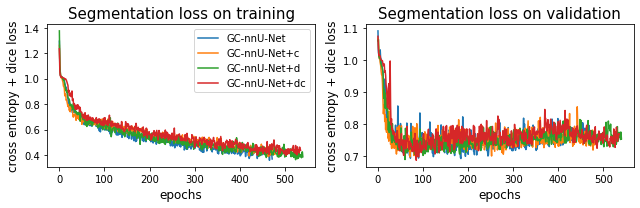

In [28]:
## plot segmentation loss

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9,3))
for exp, exp_name in zip(exps,exp_names):
    scores = exp.get_scores(split='train')['dice'] + exp.get_scores(split='train')['cross_entropy']
    ax1.plot(scores.index, scores, label=exp_name)
    scores = exp.get_scores(split='val')['dice'] + exp.get_scores(split='val')['cross_entropy']
    ax2.plot(scores.index, scores, label=exp_name)
ax1.set_xlabel('epochs', fontsize=12)
ax1.set_ylabel('cross entropy + dice loss', fontsize=12)
ax1.set_title(f'Segmentation loss on training', fontsize=15)
# ax1.set_xlim([0,600])
ax1.legend(loc='upper right')
ax2.set_xlabel('epochs', fontsize=12)
ax2.set_ylabel('cross entropy + dice loss', fontsize=12)
ax2.set_title(f'Segmentation loss on validation', fontsize=15)
# ax2.set_xlim([0,600])

plt.tight_layout()

fig.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_nnunet/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-23_QUCI_classification/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_distance/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-01_WRZI_classification_distance/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_nnunet/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-23_QUCI_classification/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_distance/s_0/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-01_WRZI_classification_distance/s_0/fold_00


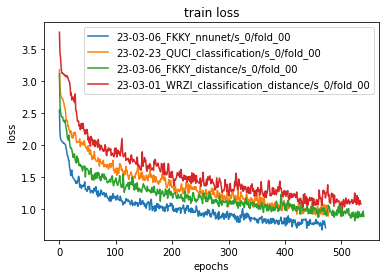

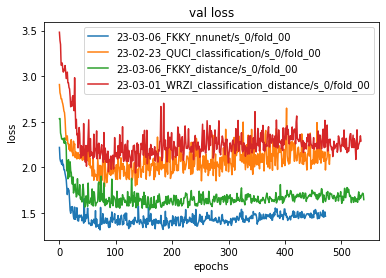

In [17]:
# plot total loss
def plot_scores(exps, score='loss', split='val'):
    scores = []
    fig, ax = plt.subplots(1,1)
    stored_scores=[]
    for exp in exps:
        scores = exp.get_scores(split=split)[score]
        ax.plot(scores.index, scores, label=os.path.join(exp.experiment_name, f'fold_{exp.fold:02d}'))
        stored_scores.append(scores)
    ax.set_xlabel('epochs')
    ax.set_ylabel(score)
    ax.set_title(f'{split} {score}')
    plt.legend()
    return stored_scores

dice_l=plot_scores(exps, 'loss',split='train')
dice_l=plot_scores(exps, 'loss',split='val')


In [22]:
#extract max aurocs across exps
exp_name='GC-nnU-Net'
split='val'
score='auroc'
stored_scores = np.zeros((len(big_exp[exp_name]),5))
for fold in np.arange(5):
    experiment_paths = big_exp[exp_name].copy()
    for pi,path in enumerate(experiment_paths):
        experiment_paths[pi] = os.path.join(path,f'fold_0{fold}')
    exps = [Experiment.from_folder(os.path.join(EXPERIMENT_PATH,p)) for p in experiment_paths]
    for ei,exp in enumerate(exps):
        scores = exp.get_scores(split=split)[score]
        stored_scores[ei,fold]=np.max(scores)


In [23]:
import ptitprince as pt
names = []
for e in experiment_paths:
    names.append(e.split("/")[0][14:])
df = pd.DataFrame(stored_scores.T,columns=names)
fig, ax = plt.subplots()
pt.RainCloud(data=df,ax=ax)
for ni,name in enumerate(names):
    plt.scatter(ni,np.mean(df[name]))
ax.set_title(exp_name)